In [151]:
import warnings
warnings.filterwarnings('ignore')

import keras
from keras import backend as k
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Flatten, Embedding, Input
from keras.layers import BatchNormalization, Lambda
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras import regularizers
from keras.losses import mse, mae
from keras.layers.merge import dot
import tensorflow as tf

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [136]:
movies = pd.read_csv("./movies.csv")
movies.dropna(inplace = True)
movies.sort_values(by='movieId', inplace = True)
movies.reset_index(inplace = True, drop = True)

ratings = pd.read_csv('./ratings.csv')
ratings.dropna(inplace = True)
ratings.drop(columns = 'timestamp', inplace = True)
ratings.sort_values(by = 'movieId', inplace =True)
ratings.reset_index(inplace = True, drop = True)

In [137]:
movies['year'] = movies.title.str.extract("\((\d{4})\)")
movies.year = pd.to_datetime(movies.year, format = '%Y')
movies.year = movies.year.dt.year
movies.title = movies.title.str[:-7]

In [138]:
movies['year'] = movies.title.str.extract("\((\d{4})\)")
movies.year = pd.to_datetime(movies.year, format = '%Y')
movies.year = movies.year.dt.year
movies.title = movies.title.str[:-7]

In [139]:
data = ratings.sample(frac = 0.25)

In [140]:
movie_ratings = data.merge(movies, left_on = 'movieId', right_on = 'movieId').sort_values('userId', ascending = True)

In [141]:
movie_ratings.head()

,userId,movieId,rating,title,genres,year
2400120,1,2194,3.5,Untouchabl,Action|Crime|Drama,NaN
1592984,1,4226,3.5,,Mystery|Thriller,NaN
709493,1,2291,4.0,Edward Sciss,Drama|Fantasy|Romance,NaN
908648,1,337,3.5,What's Eating Gilber,Drama,NaN
3396,1,2918,3.5,Ferris Bueller's,Comedy,NaN


In [142]:
x_train, x_test = train_test_split(movie_ratings, test_size = 0.25, shuffle = True)
x_valid, x_test = train_test_split(x_test, test_size = 0.5, shuffle = True)

In [143]:
print(len(x_train))
print(len(x_valid))
print(len(x_test))

user_count = movie_ratings.userId.nunique()
movie_count = movie_ratings.movieId.nunique()
print(user_count)
print(movie_count)

3750049
625008
625009
138449
21116


In [144]:
x_train

,userId,movieId,rating,title,genres,year
3277135,75941,3826,2.0,Hol,Horror|Sci-Fi|Thriller,NaN
2696595,103811,58,5.0,"Postman, The (Posti",Comedy|Drama|Romance,NaN
4387992,97053,125,4.0,Flirting With D,Comedy,NaN
2749957,24237,1207,4.0,To Kill a Mock,Drama,NaN
4768243,86305,7263,4.0,,Drama,NaN
...,...,...,...,...,...,...
4583030,56367,5577,3.5,Igby Go,Comedy|Drama,NaN
111948,53930,2478,3.0,¡Three,Comedy|Western,NaN
235159,97959,589,3.0,Terminator 2: Judgm,Action|Sci-Fi,NaN
4436787,132395,86377,0.5,Louis C.K.: Sh,Comedy,NaN


In [145]:
losses = pd.read_csv('./loss_history.txt', sep=',', header = None)
val_losses = pd.read_csv('./val_loss_history.txt', sep=',', header = None)

Text(0.5, 1.0, 'MSE Loss per epoch')

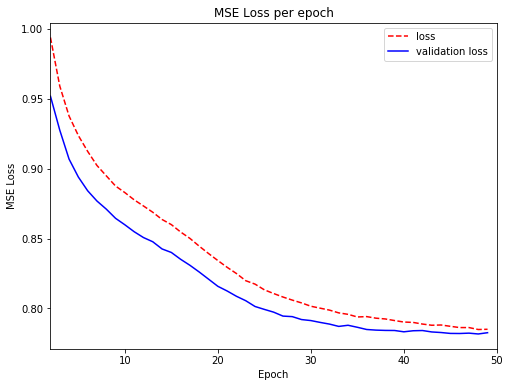

In [146]:
x = np.arange(50)
plt.figure(figsize = (8,6))
plt.plot(x[2:], losses[2:], 'r--', label='loss')
plt.plot(x[2:], val_losses[2:], 'b-', label= 'validation loss')
plt.legend(loc="upper right")
plt.xlim(2,50)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('MSE Loss per epoch')

In [147]:
from keras.models import load_model

In [148]:
load_model = load_model('./weights00000050.h5')

In [152]:
model_preds = load_model.predict(x = [x_test.userId, x_test.movieId])

InvalidArgumentError: indices[7,0] = 55247 is not in [0, 27279)
	 [[{{node movie_embedding_1/embedding_lookup}}]]

In [ ]:
predicted_ratings = x_test.iloc[:,0:5]
predicted_ratings['predicted_ratings'] = model_preds

predicted_ratings = predicted_ratings[['userId', 'movieId', 'rating', 'predicted_ratings', 'title', 'genres']].sort_values(
    by = 'userId', ascending = True)